**Introduction:**

1. Marketers spend a lot to attract new customers as compared to expenses on retaining the current customers.
2. To maintain and extend business, one ought to realize being able to hold existing customers is as crucial as finding new customers.
3. If the rate of customer retention is greater than the rate of new customers, then the database as a whole is reducing if existing customers go off then transactions will be less.
4. In a way, holding current customers’ priority exceeds looking for new customers.

The features in the given dataset are:

1. **InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
2. **StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
3. **Description:** Product (item) name. Nominal.
4. **Quantity:** The quantities of each product (item) per transaction. Numeric.
5. **InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.
6. **UnitPrice:** Unit price. Numeric, Product price per unit in sterling.
7. **CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
8. **Country:** Country name. Nominal, the name of the country where each customer resides

In [50]:
#importing necessary dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/Jai Wason/Documents/OnlineRetail.csv',encoding= 'unicode_escape') 

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [5]:
#checking for null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

We will drop all the null values

In [6]:
df = df.dropna()

What is RFM Analysis?

RFM analysis is basically scoring our customers based on their Recency, Frequency and Monetary values.
Let’s understand what Recency, Frequency and Monetary are.

1. **Recency**: How recently a customer made a purchase.
For example, If you buy something on January 1th and today is February 1th your recency is 30 days.

2. **Frequency**: How often customers make a purchase.
This is the number of orders that you made from your first purchase date. If you buy a t-shirt on January 1th and buy jeans on January 15th Your frequency is 2.

3. **Monetary Value**: How much money a customer spends on purchases.
Let’s refer to the previous example where you made 2 purchases. The T-shirt costs you 20 dollars and the jeans are 35dollars. Your monetary value is 55 $.

**Note:** Sometimes monetary value can be the average spending of each customer.
Now that we understand what Recency, Frequency and Monetary Value are, we can go to our project.

## Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [8]:
#descriptive statistics
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Monetary DataFrame:** 

In [9]:
#creating monetary dataframe
df['Amount'] = df['Quantity']*df['UnitPrice']
monetary = df.groupby('CustomerID')['Amount'].sum()
monetary = monetary.reset_index()
monetary.rename(columns={'Amount':'Monetary'},inplace =True)
monetary.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [10]:
monetary.shape

(4372, 2)

**Frequency DataFrame:** We are calculating the frequency of customers by counting Invoice numbers of each customer, the more the count the more often the customer buys from the store.

In [11]:
#creating frequency Dataframe:
frequency = df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns= ['CustomerID','Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


**Recency DataFrame:** We are calculating recency by subtracting the very recent date with the last transaction date of the customers.    

In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = '%m/%d/%Y %H:%M')

In [13]:
df['Diff'] = max(df['InvoiceDate']) - df['InvoiceDate']
recency = df.groupby('CustomerID')['Diff'].min()
 
recency = recency.reset_index()
recency.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [14]:
recency['Diff'] = recency['Diff'].dt.days

In [15]:
recency.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


We will merge all the columns of recency, monetary and frequency into one dataframe named rfm along with the CustomerID

In [16]:
rfm = pd.merge(recency, frequency, on='CustomerID', how ='inner')
rfm = pd.merge(rfm, monetary, on='CustomerID', how='inner')
rfm.columns = ['CustomerID','Recency','Frequency','Monetary']
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


<AxesSubplot:xlabel='Recency'>

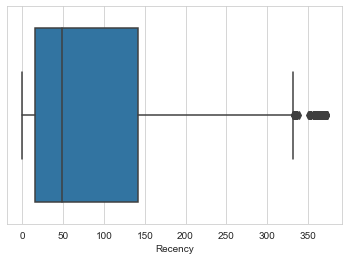

In [17]:
sns.set_style("whitegrid")  
sns.boxplot(x = 'Recency', data = rfm, orient='h')

<AxesSubplot:xlabel='Frequency'>

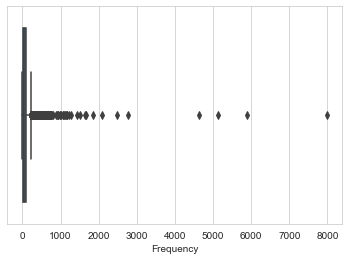

In [18]:
sns.boxplot(x = 'Frequency', data = rfm, orient='h') 

<AxesSubplot:xlabel='Monetary'>

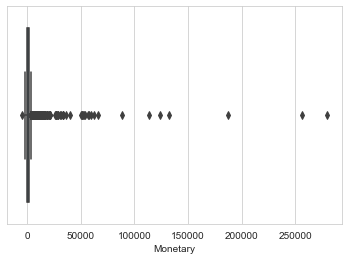

In [19]:
sns.boxplot(x = 'Monetary', data = rfm, orient='h')

From the boxplots, we can observe that dataset suffers from outliers which might cause inaccurate predictions.
Hence, we will use Standard scaler to scale the values of the columns.

In [20]:
scaler = StandardScaler()
rfm_normalized = rfm[['Monetary','Frequency','Recency']]
rfm_normalized

,Monetary,Frequency,Recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309
...,...,...,...
4367,180.60,10,277
4368,80.82,7,180
4369,176.60,13,7
4370,2094.88,756,3


In [21]:
rfm_normalized = scaler.fit_transform(rfm_normalized)
rfm_normalized = pd.DataFrame(rfm_normalized)
rfm_normalized.columns = ['Monetary','Frequency','Recency']

We will again plot the boxplots:

<AxesSubplot:xlabel='Recency'>

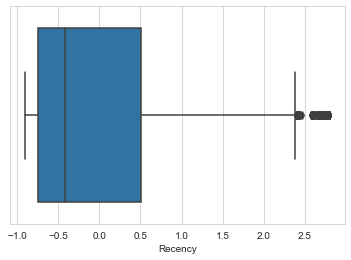

In [22]:
sns.boxplot(x = 'Recency', data = rfm_normalized, orient='h')

<AxesSubplot:xlabel='Frequency'>

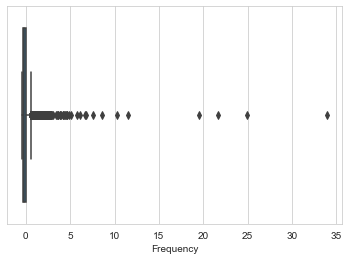

In [23]:
sns.boxplot(x = 'Frequency', data = rfm_normalized, orient='h')

<AxesSubplot:xlabel='Monetary'>

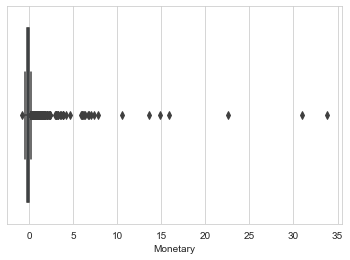

In [24]:
sns.boxplot(x = 'Monetary', data = rfm_normalized, orient='h')

In [25]:
rfm_normalized.shape

(4372, 3)

**K Means Clustering**

1. Kmeans algorithm is an iterative algorithm that tries to partition the dataset into K distinct clusters. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as far as possible. 
2. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid is at the minimum. The less variation we have within clusters, the more homogeneous the data points are within the same cluster.

We have used two methods to decide K value for the K-Means clustering: one is elbow method and another is silhouette score.

**Elbow Curve:**

1. A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. 
2. The Elbow Method is one of the most popular methods to determine this optimal value of k.
3. Here, we have tried to plot the cluster numbers as the x-axis and their respective score on the y axis. 
4. By observing the graph, using the elbow method dividing the data frame into 3 clusters gives proper results.

In [26]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter=50)
    kmeans.fit(rfm_normalized)
    ssd.append(kmeans.inertia_)

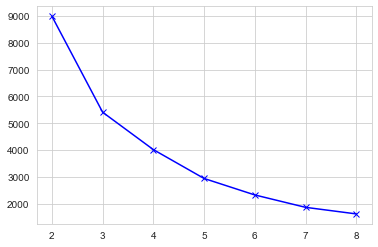

In [27]:
plt.plot(range_n_clusters,ssd,'bx-')

**Silhouette Analysis**
silhouette score=(𝑝−𝑞)/𝑚𝑎𝑥(𝑝,𝑞)

1. p is the mean distance to the points in the nearest cluster that the data point is not a part of [6]
2. q is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.
1. A score closer to 1 indicates that the data point is very similar to other data points in the cluster,
2. A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [28]:
for num_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters = num_cluster, max_iter=50)
    kmeans.fit(rfm_normalized)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(rfm_normalized, cluster_labels)
    print("For n_clusters = {0}, the silhoutte score is {1}".format(num_cluster, silhouette_avg))

For n_clusters = 2, the silhoutte score is 0.9293984525918874
For n_clusters = 3, the silhoutte score is 0.6003883114752382
For n_clusters = 4, the silhoutte score is 0.5981422039499412
For n_clusters = 5, the silhoutte score is 0.6160117259955692
For n_clusters = 6, the silhoutte score is 0.5856955818362631
For n_clusters = 7, the silhoutte score is 0.5280844790099359
For n_clusters = 8, the silhoutte score is 0.5148926724289398


Finalized the model with N_clusters = 3 based on above analysis. Now, we will fit the model finalized with 3 clusters.

In [29]:
kmeans = KMeans(n_clusters=3, max_iter =50)
kmeans.fit(rfm_normalized)

KMeans(max_iter=50, n_clusters=3)

In [30]:
rfm_normalized.loc[:,'CustomerID'] = rfm['CustomerID']
rfm_normalized.head()

,Monetary,Frequency,Recency,CustomerID
0,-0.231001,-0.391720,2.322023,12346.0
1,0.293432,0.382657,-0.893733,12347.0
2,-0.012316,-0.266959,-0.169196,12348.0
3,-0.017146,-0.086271,-0.725005,12349.0
4,-0.190312,-0.327188,2.163220,12350.0


In [31]:
rfm_normalized.shape

(4372, 4)

In [32]:
rfm_normalized["Cluster No."] = kmeans.labels_

In [33]:
rfm_normalized.head()

,Monetary,Frequency,Recency,CustomerID,Cluster No.
0,-0.231001,-0.391720,2.322023,12346.0,1
1,0.293432,0.382657,-0.893733,12347.0,0
2,-0.012316,-0.266959,-0.169196,12348.0,0
3,-0.017146,-0.086271,-0.725005,12349.0,0
4,-0.190312,-0.327188,2.163220,12350.0,1


Now, the customers are divided into 3 groups, the last cluster people are the ones who spent more.

<AxesSubplot:xlabel='Cluster No.', ylabel='Monetary'>

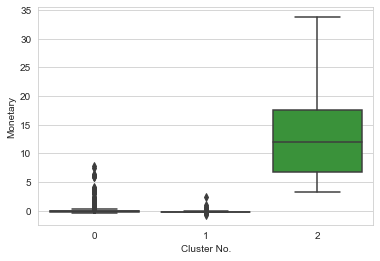

In [34]:
sns.boxplot(x='Cluster No.', y='Monetary', data = rfm_normalized)

<AxesSubplot:xlabel='Cluster No.', ylabel='Frequency'>

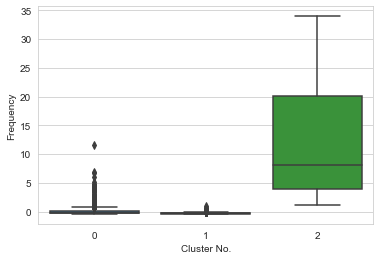

In [35]:
sns.boxplot(x='Cluster No.', y='Frequency', data = rfm_normalized)

<AxesSubplot:xlabel='Cluster No.', ylabel='Recency'>

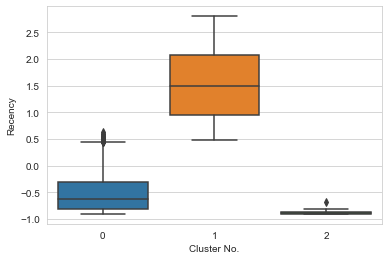

In [36]:
sns.boxplot(x='Cluster No.', y='Recency', data = rfm_normalized)

<AxesSubplot:xlabel='Recency', ylabel='Monetary'>

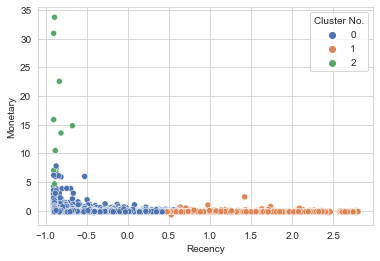

In [40]:
sns.scatterplot(x='Recency', y='Monetary',hue='Cluster No.', data=rfm_normalized,palette="deep")

<AxesSubplot:xlabel='Frequency', ylabel='Monetary'>

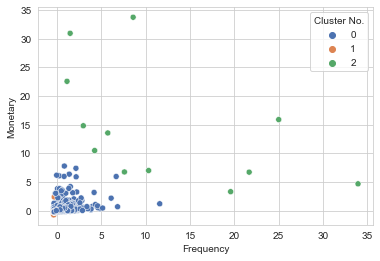

In [39]:
sns.scatterplot(x='Frequency', y='Monetary',hue='Cluster No.', data=rfm_normalized,palette="deep")

<AxesSubplot:xlabel='Recency', ylabel='Frequency'>

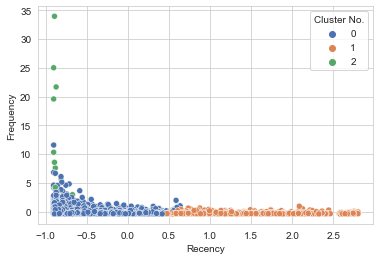

In [41]:
sns.scatterplot(x='Recency', y='Frequency',hue='Cluster No.', data=rfm_normalized,palette="deep")

In [47]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d

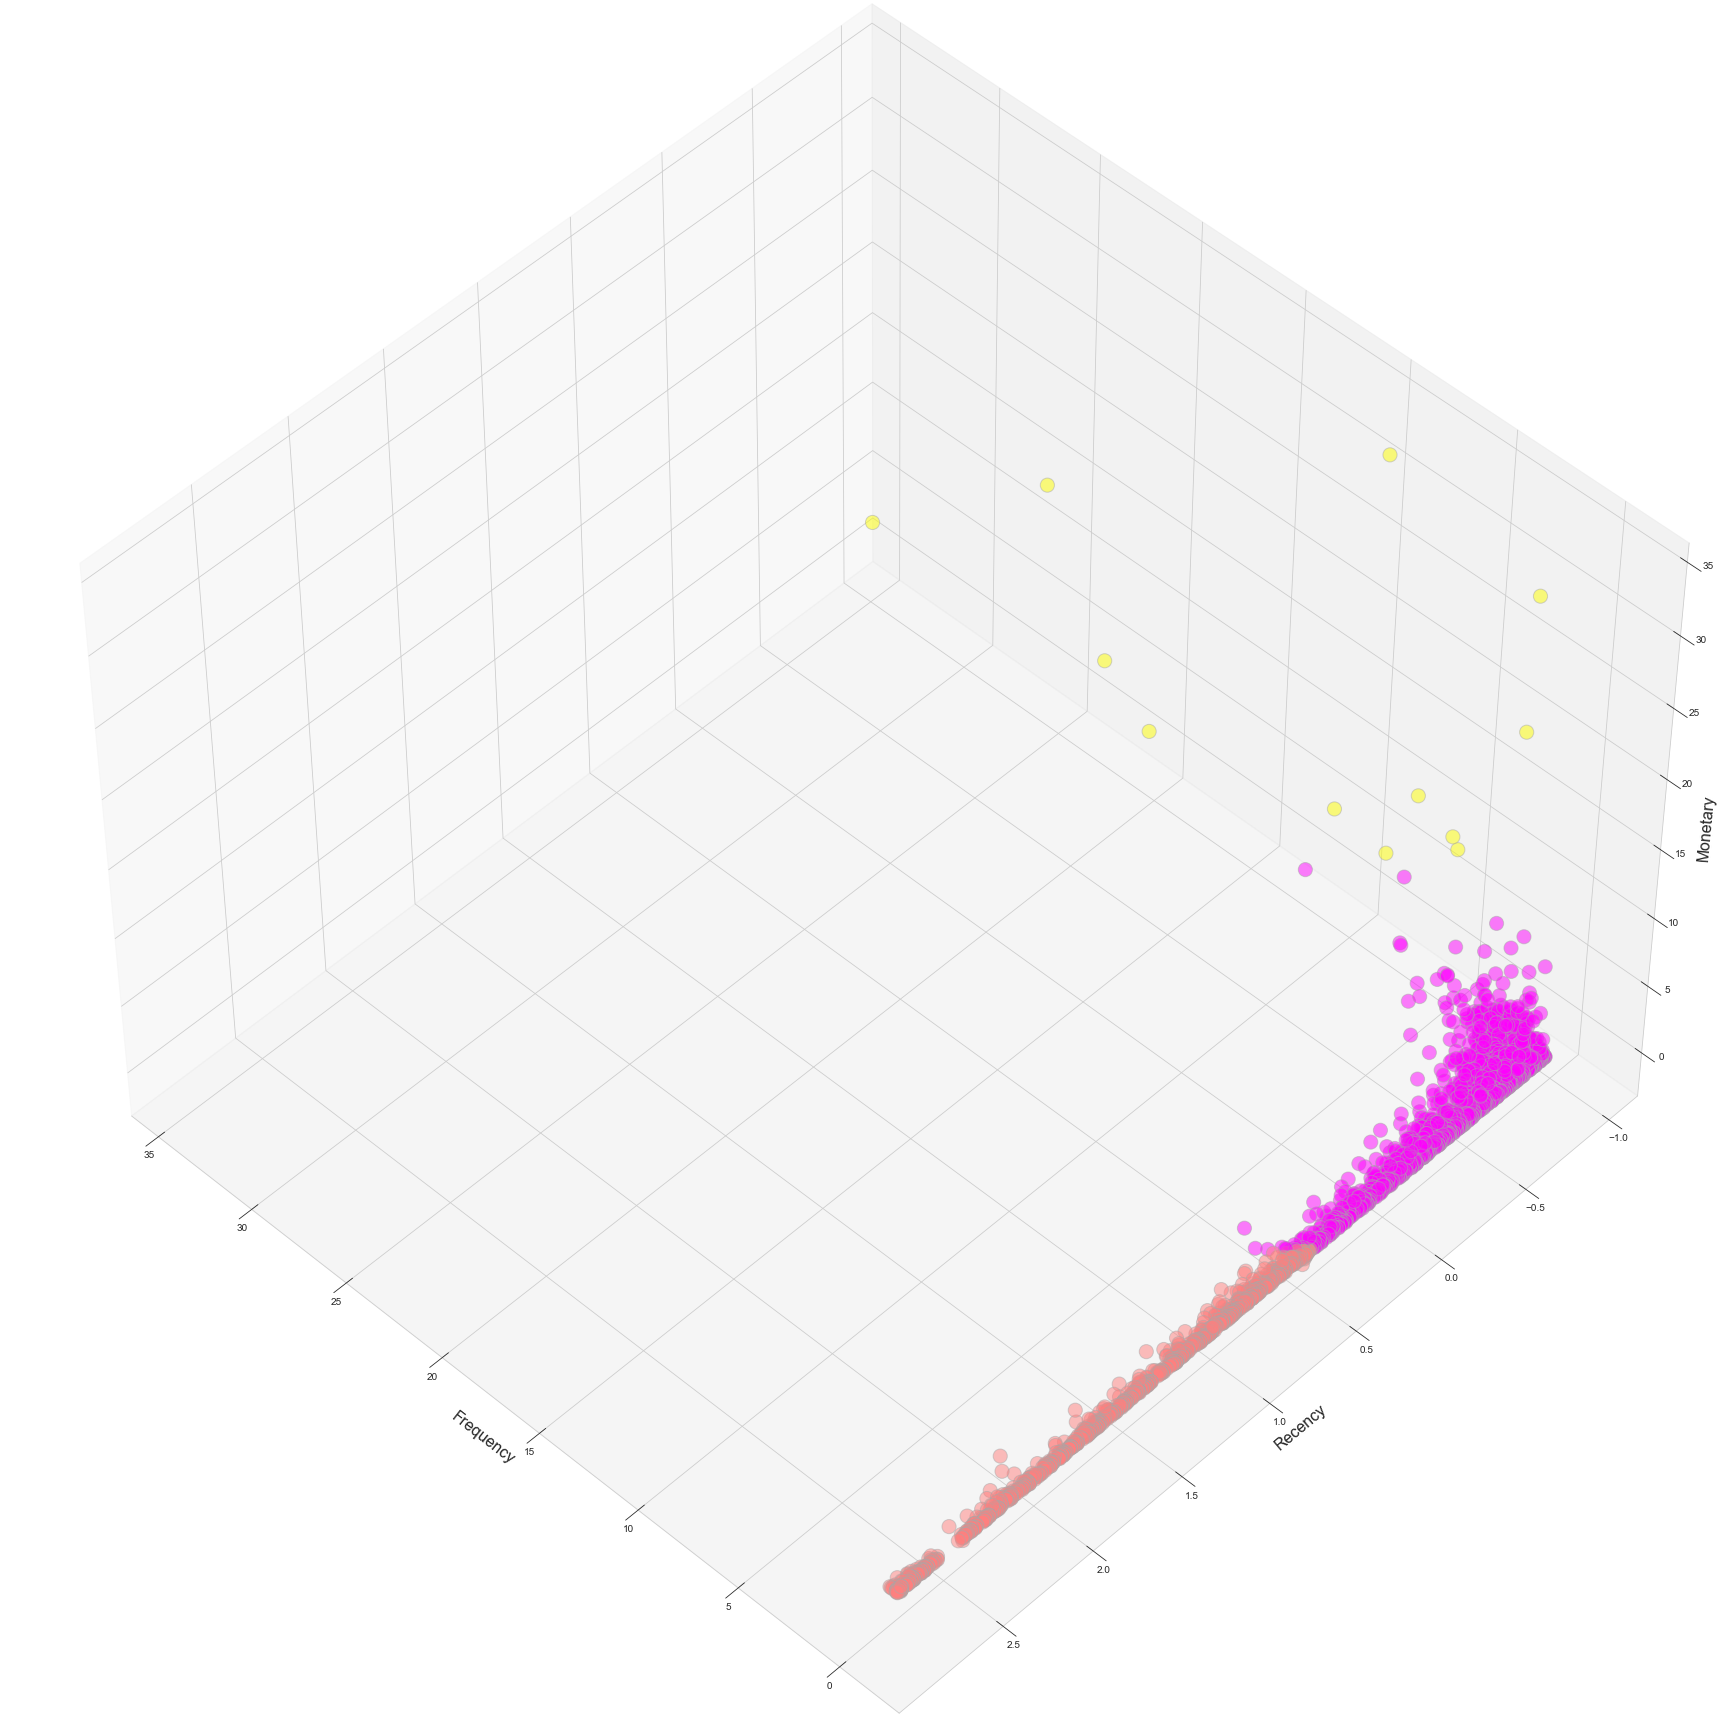

In [51]:
plt.rcParams['figure.figsize']=(25,25)
fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0,0,.95,1],
           elev=48,
           azim = 134)
plt.cla()
ax.scatter(rfm_normalized['Frequency'],rfm_normalized['Recency'],rfm_normalized['Monetary'],
          c = rfm_normalized['Cluster No.'],
          s = 200,
          cmap='spring',
          alpha = 0.5,
          edgecolor='darkgrey')
ax.set_xlabel('Frequency',fontsize=16)
ax.set_ylabel('Recency',fontsize=16)
ax.set_zlabel('Monetary',fontsize=16)
plt.show()

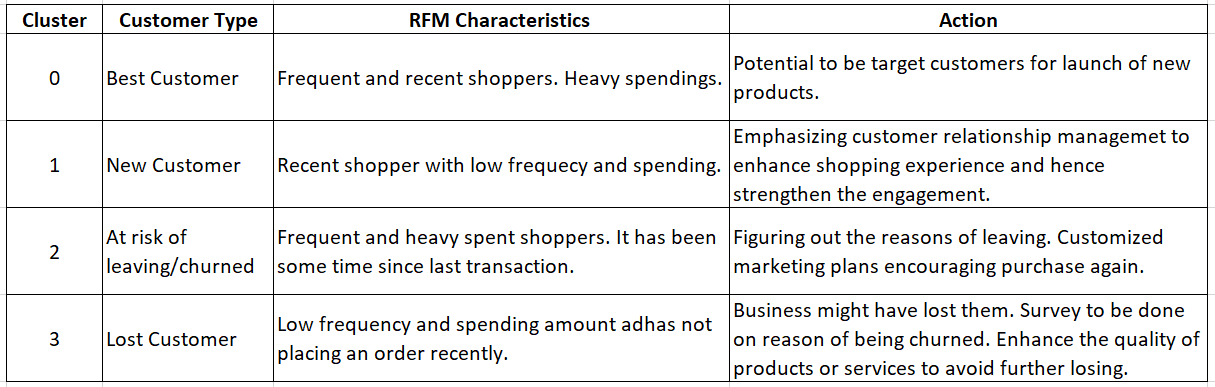